#Import Package

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from urllib.request import Request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
import traceback
import tensorflow as tf

In [ ]:
!pip install fastapi[all]
!pip install uvicorn
!pip install utils
!pip install tensorflow
#!pip install --upgrade typing-extensions
#!pip install --upgrade fastapi
#!pip install --upgrade pydantic

In [ ]:
!python3 --version

Python 3.10.12


#Load Dataset

In [149]:
# Load dataset
data = pd.read_csv("/content/gdrive/MyDrive/Capstone/dataset - Gabungan.csv")

In [150]:
data.describe()

,Job Position,Office,City,Country,Salary,Work Time,Job Level,Job Level Specific,Job_Category,Industry
count,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124
unique,1039,242,64,6,214,7,7,5,23,117
top,Account Executive,Aces Call Center Jobs Inc.,Singapore,Indonesia,Salary Undisclosed,Full Time,Entry Level,"Junior, Apprentice",Sales and Marketing,Financial Services
freq,8,101,172,686,759,1028,630,630,308,166


In [151]:
data.head()

,Job Position,Office,City,Country,Salary,Work Time,Job Level,Job Level Specific,Job_Category,Industry
0,.NET Developer,NTT INDONESIA TECHNOLOGY,Jakarta Pusat,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,IT and Software,Information Technology / IT
1,.Net Senior API developer,Gluon Consulting Pte. Ltd.,Jakarta Pusat,Indonesia,"IDR 23,158,053.49 - IDR 38,596,755.82",Full Time (Remote),Mid-Senior Level,Manager,IT and Software,IT and Software
2,[BANDAR JAYA] Microfinancing Sales Section Head,FIFGROUP,Bandar Lampung,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,Sales and Marketing,Financial Services
3,[CAKUNG] Microfinancing Sales Section Head,FIFGROUP,Jakarta Timur,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,Sales and Marketing,Financial Services
4,[HCM] Growth Marketing Manager,Timo Digital Bank,"Thành phố Hồ Chí Minh,",Vietnam,Salary Undisclosed,Full Time,Mid-Senior Level,Manager,Sales and Marketing,Banking


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Position        1124 non-null   object
 1   Office              1124 non-null   object
 2   City                1124 non-null   object
 3   Country             1124 non-null   object
 4   Salary              1124 non-null   object
 5   Work Time           1124 non-null   object
 6   Job Level           1124 non-null   object
 7   Job Level Specific  1124 non-null   object
 8   Job_Category        1124 non-null   object
 9   Industry            1124 non-null   object
dtypes: object(10)
memory usage: 87.9+ KB


In [153]:
missing_data = data.isnull()
total_missing = missing_data.sum()
print(total_missing)

Job Position          0
Office                0
City                  0
Country               0
Salary                0
Work Time             0
Job Level             0
Job Level Specific    0
Job_Category          0
Industry              0
dtype: int64


This code is used to transform categorical values into numerical labels

In [154]:
encoder = LabelEncoder()
data['Job Position'] = encoder.fit_transform(data['Job Position'])
data['Office'] = encoder.fit_transform(data['Office'])
data['City'] = encoder.fit_transform(data['City'])
data['Country'] = encoder.fit_transform(data['Country'])
data['Salary'] = encoder.fit_transform(data['Salary'])
data['Work Time'] = encoder.fit_transform(data['Work Time'])
data['Job Level'] = encoder.fit_transform(data['Job Level'])
data['Job Level Specific'] = encoder.fit_transform(data['Job Level Specific'])
data['Job_Category'] = encoder.fit_transform(data['Job_Category'])
data['Industry'] = encoder.fit_transform(data['Industry'])
#data['Qualification 1'] = encoder.fit_transform(data['Qualification 1'])
#data['Qualification 2'] = encoder.fit_transform(data['Qualification 2'])
#data['Qualification 3'] = encoder.fit_transform(data['Qualification 3'])
#data['Qualification 4'] = encoder.fit_transform(data['Qualification 4'])
#data['Qualification 5'] = encoder.fit_transform(data['Qualification 5'])


This code snippet processes the 'Job_Category' feature in the DataFrame data by converting it to numeric format and handling missing values through mean imputation. The resulting representation is suitable for analysis or machine learning applications.

In [155]:
selected_features = data[['Job_Category']]
selected_features = selected_features.apply(pd.to_numeric, errors='coerce')
selected_features = selected_features.fillna(selected_features.mean())
selected_features = selected_features.dropna()

In [156]:
print("Before scaling - Shape of selected_features:", selected_features.shape)
print("Data before scaling:\n", selected_features)

Before scaling - Shape of selected_features: (1124, 1)
Data before scaling:
       Job_Category
0               11
1               11
2               19
3               19
4               19
...            ...
1119            22
1120            16
1121            19
1122            11
1123            11

[1124 rows x 1 columns]


In [157]:
if selected_features.shape[0] > 0:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(selected_features)
else:
    print("Error: Empty dataset.")

In [158]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

In [159]:
num_clusters = 4
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [160]:
cluster_labels = kmeans_model.predict(scaled_data)

In [161]:
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8018031210172425


In [162]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(scaled_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(scaled_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.6544638123146421


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.7803456791972703


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.8018031210172425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.7709703384441622
For n_clusters = 6, silhouette score is 0.8023450176912185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.8094512428233064
For n_clusters = 8, silhouette score is 0.8169915323236059
For n_clusters = 9, silhouette score is 0.8232904805822073


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Determine K-Means value use Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

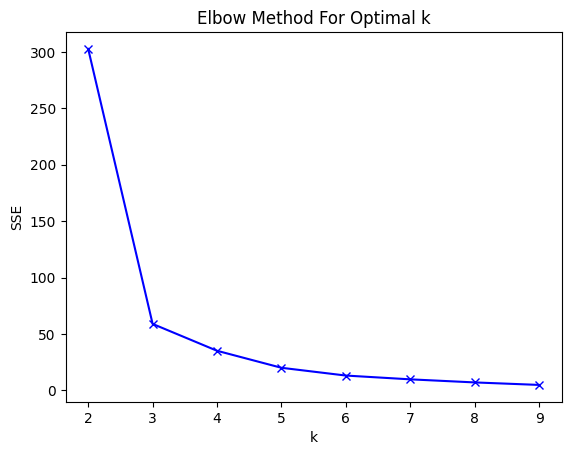

In [163]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_error.append(km.inertia_)
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [164]:
print(data.columns)

Index(['Job Position', 'Office', 'City', 'Country', 'Salary', 'Work Time',
       'Job Level', 'Job Level Specific', 'Job_Category', 'Industry'],
      dtype='object')


This code provides a basic K-means clustering implementation using TensorFlow for job category data and includes a simple visualization of the clustered data.

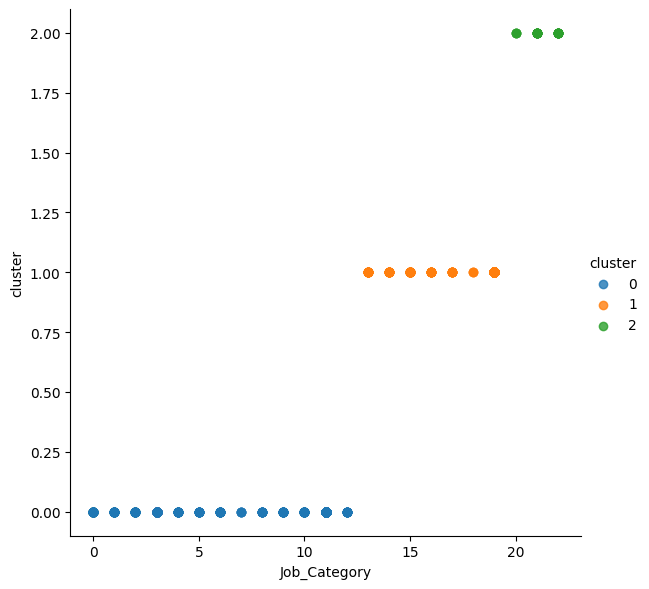

In [182]:
def k_means_clustering(data, job_category_col, clusters, steps=100, random_state=42):
    np.random.seed(random_state)  # Set random seed for NumPy
    tf.random.set_seed(random_state)  # Set random seed for TensorFlow

    vec_vals = np.array(list(zip(data[job_category_col])))
    np.random.shuffle(vec_vals)

    k = clusters
    points = vec_vals.astype(np.float32)  # Convert to float32
    data = tf.constant(points, dtype=tf.float32)

    # Random initial centroids (points shuffled above)
    centroids = tf.Variable(data[:k, :])

    for step in range(steps):
        # Rest of your code...
        allocations = tf.argmin(tf.reduce_sum(tf.square(data - centroids[:, tf.newaxis]), axis=2), axis=0)

        # Update centroids
        means = tf.concat([tf.reduce_mean(tf.gather(data, tf.where(tf.equal(allocations, c))), 0) for c in range(k)], 0)
        centroids.assign(means)

    allocation_values = tf.argmin(tf.reduce_sum(tf.square(data - centroids[:, tf.newaxis]), axis=2), axis=0)

    clusters_df = pd.DataFrame({job_category_col: points[:, 0], "cluster": allocation_values.numpy()})
    sns.lmplot(x=job_category_col, y="cluster", data=clusters_df, fit_reg=False, height=6, hue="cluster")
    plt.show()

    with open("clustering_results.pkl", "wb") as f:
        pickle.dump(clusters_df, f)

# Contoh pemanggilan fungsi
k_means_clustering(data, 'Job_Category', 4, random_state=42)